In [19]:
import pandas as pd

In [18]:
file_path = '/home/habib/Desktop/flash_ssd_simulator_web/trace/trace/ssdtrace-04'
df = pd.read_csv(
    file_path,
    delim_whitespace=True,  # Use whitespace as the delimiter
    header=None,             # No header in the file
    usecols=range(9),        # Only consider the first 9 columns
    nrows=1000000,            # Only read the first 1,000,000 rows
    engine="python"          # Use the Python engine to handle bad lines more gracefully
)


In [21]:
df.head(200)

,0,1,2,3,4,5,6,7,8
0,"259,2",23,10851310,4533.483651,4020,D,RS,158826064,+
1,"259,2",15,10226995,4533.483656,0,C,RS,23935824,+
2,"259,2",14,10985140,4533.483658,0,C,RS,153192128,+
3,"259,2",21,10985034,4533.483667,4042,C,RS,308925472,+
4,"259,2",21,10985035,4533.483668,4042,C,RS,308925528,+
...,...,...,...,...,...,...,...,...,...
195,"259,2",20,10654415,4533.484262,4023,Q,R,369578064,+
196,"259,2",20,10654416,4533.484263,4023,G,R,369578064,+
197,"259,2",20,10654417,4533.484264,4023,U,N,[java],1
198,"259,2",20,10654418,4533.484264,4023,I,RS,369578064,+


In [ ]:
# Initialize an empty list to store filtered rows
filtered_rows = []

# Use chunksize to read the file in smaller parts
chunksize = 1000000  # Adjust based on memory requirements
filtered_df = pd.DataFrame()
for chunk in pd.read_csv(
    file_path,
    delim_whitespace=True,  # Use whitespace as the delimiter
    header=None,            # No header in the file
    usecols=range(9),       # Only consider the first 9 columns
    chunksize=chunksize,    # Read in chunks
    engine="python"         # Use the Python engine to handle bad lines gracefully
):
    # Filter rows where column 6 contains "W"
    filtered_chunk = chunk[chunk[6] == "W"]
    filtered_df = pd.concat([filtered_df,filtered_chunk])
    

# # Concatenate all filtered rows into a single DataFrame
# filtered_df = pd.concat(filtered_rows, ignore_index=True)

# Display the first few rows of the filtered DataFrame
print(filtered_df.head())

In [23]:
len(filtered_df)

1020

In [24]:
output_file_path = '/home/habib/Desktop/flash_ssd_simulator_web/trace/trace/ssdtrace-04-filtered'
filtered_df.to_csv(output_file_path, sep=' ', index=False, header=False)
print("Filtered trace saved to", output_file_path)

Filtered trace saved to /home/habib/Desktop/flash_ssd_simulator_web/trace/trace/ssdtrace-04-filtered


In [26]:
import pandas as pd
for i in range(10, 26):
    file_path = '/home/habib/Desktop/flash_ssd_simulator_web/trace/trace/ssdtrace-' + str(i)
    # Initialize an empty list to store filtered rows
    filtered_rows = []

    # Use chunksize to read the file in smaller parts
    chunksize = 1000000  # Adjust based on memory requirements
    filtered_df = pd.DataFrame()
    for chunk in pd.read_csv(
        file_path,
        delim_whitespace=True,  # Use whitespace as the delimiter
        header=None,            # No header in the file
        usecols=range(9),       # Only consider the first 9 columns
        chunksize=chunksize,    # Read in chunks
        engine="python"         # Use the Python engine to handle bad lines gracefully
    ):
        # Filter rows where column 6 contains "W"
        filtered_chunk = chunk[chunk[6] == "W"]
        filtered_df = pd.concat([filtered_df,filtered_chunk])
    print(len(filtered_df))
    output_file_path = '/home/habib/Desktop/flash_ssd_simulator_web/trace/trace/ssdtrace-' + str(i) + '-filtered'
    filtered_df.to_csv(output_file_path, sep=' ', index=False, header=False)
    print("Filtered trace saved to", output_file_path)

1695
Filtered trace saved to /home/habib/Desktop/flash_ssd_simulator_web/trace/trace/ssdtrace-10-filtered
1100
Filtered trace saved to /home/habib/Desktop/flash_ssd_simulator_web/trace/trace/ssdtrace-11-filtered
1030
Filtered trace saved to /home/habib/Desktop/flash_ssd_simulator_web/trace/trace/ssdtrace-12-filtered
1225
Filtered trace saved to /home/habib/Desktop/flash_ssd_simulator_web/trace/trace/ssdtrace-13-filtered
1555
Filtered trace saved to /home/habib/Desktop/flash_ssd_simulator_web/trace/trace/ssdtrace-14-filtered
1710
Filtered trace saved to /home/habib/Desktop/flash_ssd_simulator_web/trace/trace/ssdtrace-15-filtered
1950
Filtered trace saved to /home/habib/Desktop/flash_ssd_simulator_web/trace/trace/ssdtrace-16-filtered
2110
Filtered trace saved to /home/habib/Desktop/flash_ssd_simulator_web/trace/trace/ssdtrace-17-filtered
3200
Filtered trace saved to /home/habib/Desktop/flash_ssd_simulator_web/trace/trace/ssdtrace-18-filtered
2285
Filtered trace saved to /home/habib/Deskt

In [3]:
import pandas as pd

file_path = '/home/habib/Desktop/flash_ssd_simulator_web/trace/W2K8.TPCC.10-19-2007.12-51-PM.trace.csv'
# Use chunksize to read the file in smaller parts
chunksize = 1000000  # Adjust based on memory requirements
chunk_counter = 0
filtered_df = pd.DataFrame()
for chunk in pd.read_csv(
    file_path,
    skiprows=150,
    # delim_whitespace=True,  # Use whitespace as the delimiter
    header=None,            # No header in the file
    usecols=range(11),       # Only consider the first 9 columns
    chunksize=chunksize,    # Read in chunks
    engine="python"         # Use the Python engine to handle bad lines gracefully
):
    # Filter rows where column 0 contains "DiskWrite"
    filtered_chunk = chunk[chunk[0].astype(str).str.strip() == "DiskRead"]
    filtered_df = pd.concat([filtered_df,filtered_chunk])
    chunk_counter += 1
    print("Processed chunk", chunk_counter)

print(filtered_df.head())
 

Processed chunk 1
Processed chunk 2
Processed chunk 3
Processed chunk 4
Processed chunk 5
Processed chunk 6
Processed chunk 7
Processed chunk 8
Processed chunk 9
Processed chunk 10
Processed chunk 11
Processed chunk 12
Processed chunk 13
Processed chunk 14
Processed chunk 15
Processed chunk 16
Processed chunk 17
Processed chunk 18
Processed chunk 19
Processed chunk 20
Processed chunk 21
Processed chunk 22
Processed chunk 23
Processed chunk 24
Processed chunk 25
Processed chunk 26
Processed chunk 27
Processed chunk 28
Processed chunk 29
Processed chunk 30
Processed chunk 31
Processed chunk 32
Processed chunk 33
Processed chunk 34
Processed chunk 35
Processed chunk 36
Processed chunk 37
Processed chunk 38
Processed chunk 39
Processed chunk 40
Processed chunk 41
Processed chunk 42
Processed chunk 43
Processed chunk 44
Processed chunk 45
Processed chunk 46
Processed chunk 47
Processed chunk 48
Processed chunk 49
Processed chunk 50
Processed chunk 51
Processed chunk 52
Processed chunk 53
Pr

: 

In [2]:
output_file_path = '/home/habib/Desktop/flash_ssd_simulator_web/trace/trace/W2K8.TPCC.10-19-2007.12-51-PM.trace-filtered-DiskRead'
filtered_df.to_csv(output_file_path, sep=' ', index=False, header=False)
print("Filtered trace saved to", output_file_path)

Filtered trace saved to /home/habib/Desktop/flash_ssd_simulator_web/trace/trace/W2K8.TPCC.10-19-2007.12-51-PM.trace-filtered


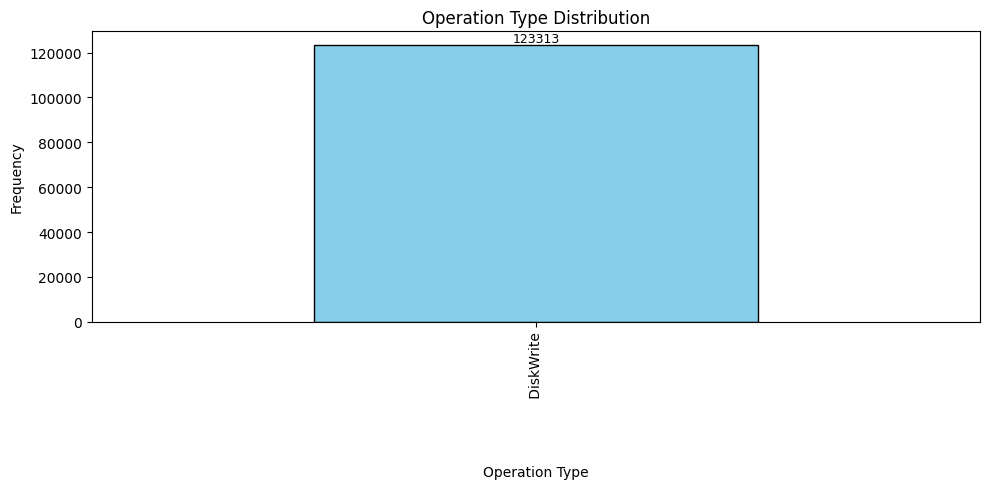

In [13]:
import matplotlib.pyplot as plt

operationType = filtered_df[0].value_counts()

plt.figure(figsize=(10, 5))
operationType.plot(kind='bar', color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Operation Type Distribution')
plt.xlabel('Operation Type')
plt.ylabel('Frequency')

for i, v in enumerate(operationType):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=9)

plt.tight_layout()    

plt.show()

In [19]:
import pandas as pd

file_path = '/home/habib/Desktop/flash_ssd_simulator_web/trace/trace/W2K8.TPCC.10-19-2007.12-51-PM.trace-filtered'

df = pd.read_csv(
    file_path,
    delim_whitespace=True,  # Use whitespace as the delimiter
    header=None,             # No header in the file
    usecols=range(9),        # Only consider the first 9 columns
    engine="python"          # Use the Python engine to handle bad lines more gracefully
)

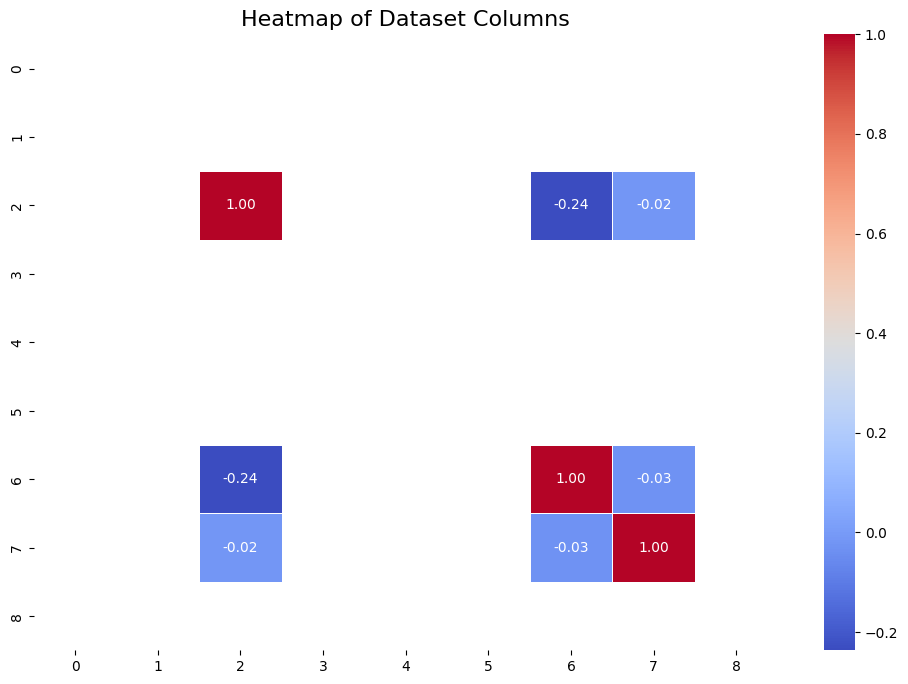

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Data preprocessing (optional)
# Convert all columns to numerical types if necessary
df = df.apply(pd.to_numeric, errors='coerce')

# Fill missing values (optional)
df.fillna(0, inplace=True)

# Create a heatmap
plt.figure(figsize=(12, 8))  # Adjust size as needed
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add title and labels
plt.title('Heatmap of Dataset Columns', fontsize=16)
plt.show()